<div style="font-family:'Book Antiqua';color:brown;">

<h1 style="color:crimson;font-size:25px;font-family: 'Book Antiqua';color:brown;">Table of Contents</h1> <a id='top'></a>

>    1. [Feature Selection](#Feature-Selection) 
>    2. [Creation of New Features](#Creation-of-New-Features) 
>    3. [Normalization and Scaling](#Normalization-and-Scaling) 
>    4. [Encoding Categorical Variables](#Encoding-Categorical-Variables) 

</div>



<h1 style="font-family:'Book Antiqua';color:brown;"> Feature Selection</h1>

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statistics 
import scipy
import numpy as np
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif, SelectKBest

In [13]:
data = pd.read_csv("final__dataset.csv")

In [4]:
data.head()

,Artist,Title,Label,Path,choruspath,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,The Weeknd,Blinding Lights,1,Songs/The Weeknd - Blinding Lights (Official V...,Songs/RepeatedPopularChorus/The Weeknd - Blind...,0.091806,0.049545,1.0,0.306971,0.570429,...,0.007217,-0.000351,-0.410349,-0.604349,0.022585,0.102132,0.017701,0.072071,0.074626,0.012681
1,Olivia Rodrigo,Good 4 U,1,Songs/Olivia Rodrigo - good 4 u (Official Vide...,Songs/RepeatedPopularChorus/Olivia Rodrigo - g...,1.025965,0.007265,1.0,0.274179,0.350277,...,-0.011851,-0.010293,0.099909,-0.233246,0.057460,0.229705,0.035304,0.147578,0.157302,-0.281870
2,Olivia Rodrigo,Drivers License,1,Songs/Olivia Rodrigo - drivers license (Offici...,Songs/RepeatedPopularChorus/Olivia Rodrigo - d...,1.395750,0.000648,1.0,0.307888,0.236975,...,0.001545,-0.009260,0.360879,0.742759,0.023492,0.178957,0.032571,0.077563,0.066463,-0.180427
3,Lil Nas X,Montero (Call Me By Your Name),1,Songs/Lil Nas X - MONTERO (Call Me By Your Nam...,Songs/RepeatedPopularChorus/Lil Nas X - MONTER...,0.926616,0.003467,1.0,0.242382,0.301311,...,-0.014834,-0.023444,0.456362,0.524002,0.051111,0.277596,0.045581,0.147997,0.142472,-0.344706
4,BTS,Butter,1,Songs/BTS (방탄소년단) 'Butter' Official MV.mp3,Songs/RepeatedPopularChorus/BTS (방탄소년단) 'Butte...,0.311976,0.037900,1.0,0.336300,0.517165,...,0.005743,0.005232,-0.153372,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Columns: 523 entries, Artist to zero_crossing_rate_kurtosis_0
dtypes: float64(518), int64(1), object(4)
memory usage: 3.0+ MB


In [6]:
 data.columns

Index(['Artist', 'Title', 'Label', 'Path', 'choruspath', 'chroma_stft_kew_0',
       'chroma_stft_min_0', 'chroma_stft_max_0', 'chroma_stft_std_0',
       'chroma_stft_mean_0',
       ...
       'tonnetz_mean_5', 'tonnetz_median_5', 'tonnetz_kurtosis_5',
       'zero_crossing_rate_kew_0', 'zero_crossing_rate_min_0',
       'zero_crossing_rate_max_0', 'zero_crossing_rate_std_0',
       'zero_crossing_rate_mean_0', 'zero_crossing_rate_median_0',
       'zero_crossing_rate_kurtosis_0'],
      dtype='object', length=523)

In [7]:
median_features = data[["chroma_stft_median_0", "chroma_cqt_median_0", "chroma_cens_median_0", "mfcc_median_0", "rms_median_0", "spectral_centroid_median_0",
           "spectral_bandwidth_median_0", "spectral_contrast_median_0", "spectral_rolloff_median_0", "tonnetz_median_0", "zero_crossing_rate_median_0"]]

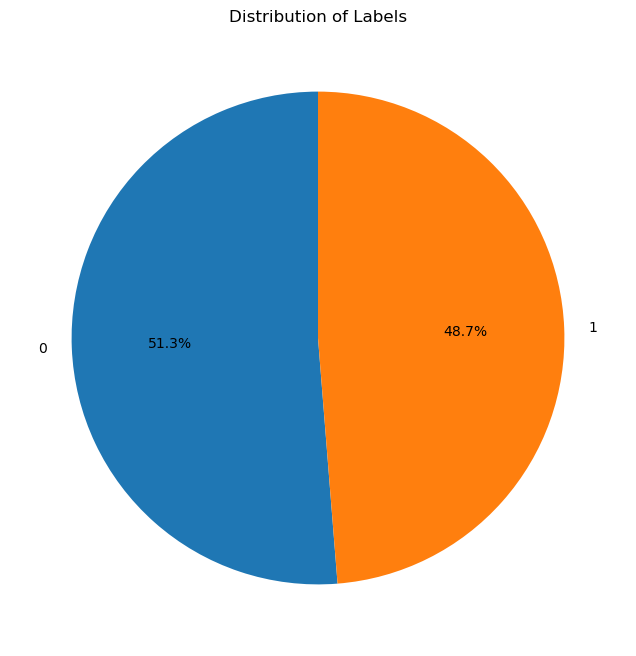

In [109]:
count_values = data['Label'].value_counts()
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.show()


<Axes: >

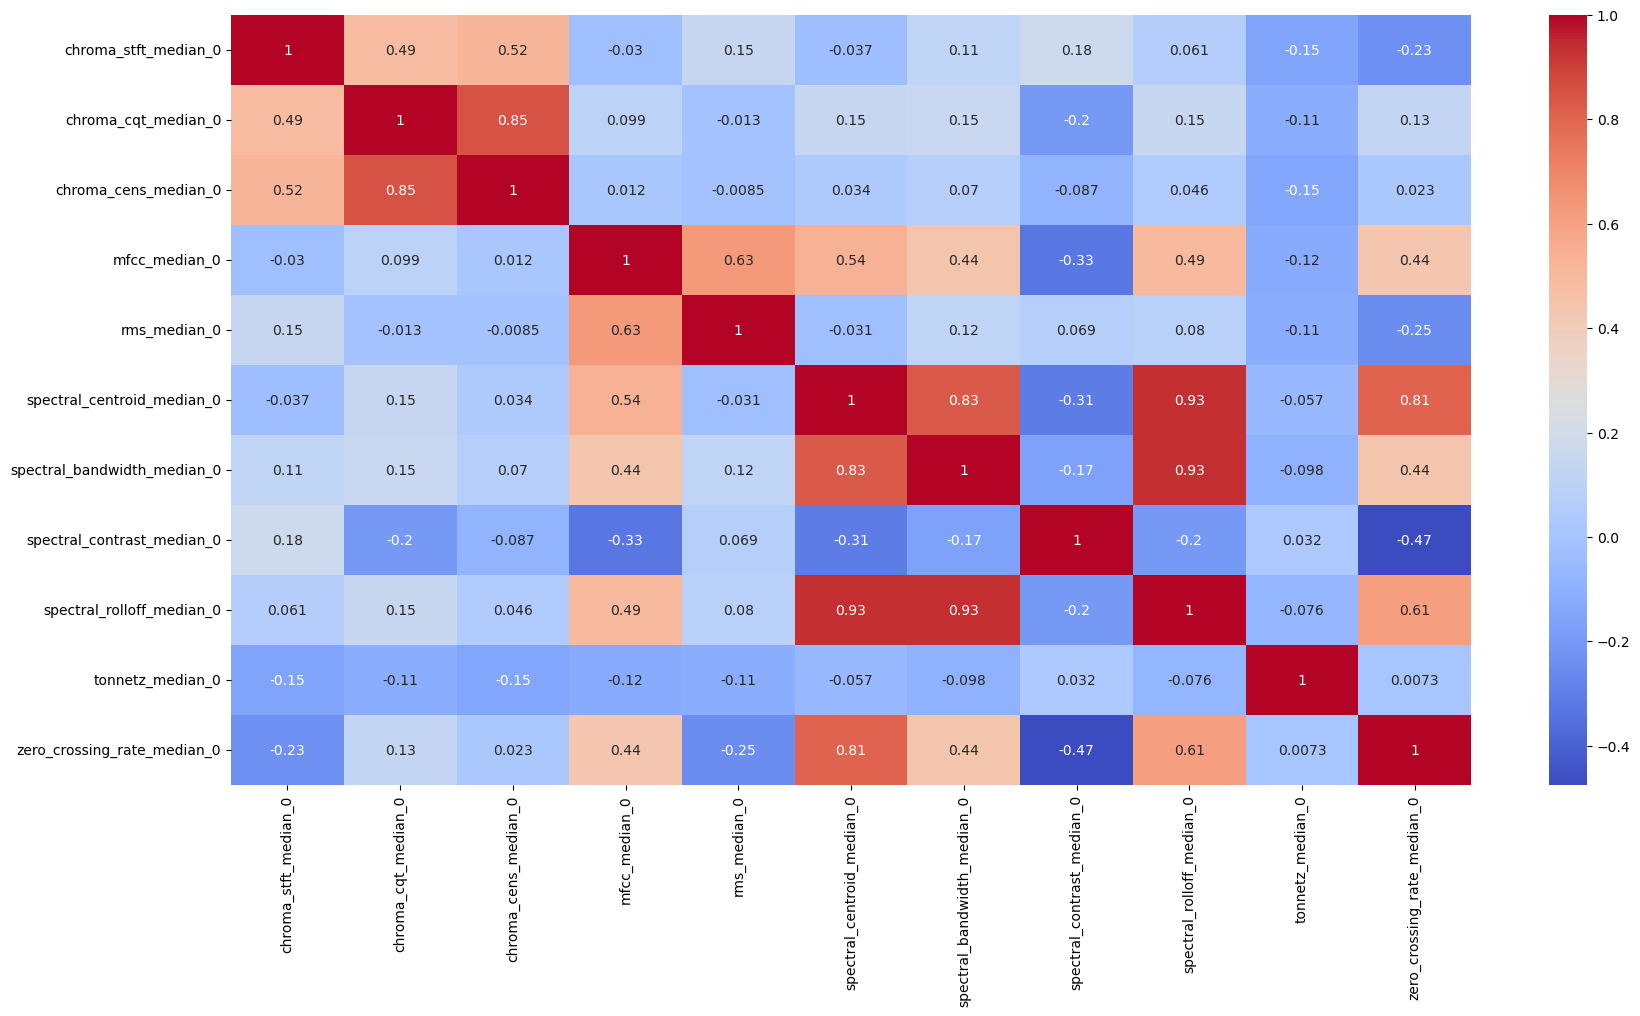

In [8]:
# Plotted directions of relationships and it's strengths between all median features
plt.figure(figsize=(20,10))
sns.heatmap(median_features.corr(), annot=True, cmap='coolwarm')

   **Strong Positive Correlations**

_chroma_cens_median_0_ and _chroma_stfl_median_ (both representing chroma features derived from short-time Fourier transform) exhibit high correlations, indicating redundancy.Similarly, features like _mfcc_median_0_ (Mel-frequency cepstral coefficients) and _spectral_centroid_median_0_ (average spectral frequency) might be correlated if they capture similar aspects of the spectral envelope.

**Strong Negative Correlations**

There is a negative correlation between _spectral_centroid_median_0_ and _spectral_bandwidth_median_0_ (spread of frequencies) could indicate sounds with a lower average frequency (high centroid) tend to have a narrower bandwidth (less spread).

  **Weak Correlations**


_spectral_centroid_median_0_(average frequency) and _spectral_flux_median_0_ (rate of spectral change) could have a weak correlation as they capture distinct aspects

This code selects numerical features from the data, calculates the correlation matrix between these features, displays the correlation matrix, identifies features with high correlation (greater than 0.8) with other features, and then removes strongly correlated features from the data

In [9]:

numerical_features = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
print("Matrice de corrélation avant la suppression des features corrélés :")
print(correlation_matrix)
highly_correlated_features = []
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col].abs() > 0.8].tolist()
    correlated_cols.remove(col)  
    highly_correlated_features.extend(correlated_cols)
data = data.drop(highly_correlated_features, axis=1)


Matrice de corrélation avant la suppression des features corrélés :
                                  Label  chroma_stft_kew_0  chroma_stft_min_0  \
Label                          1.000000          -0.007341           0.030373   
chroma_stft_kew_0             -0.007341           1.000000          -0.350917   
chroma_stft_min_0              0.030373          -0.350917           1.000000   
chroma_stft_max_0              0.023332           0.000282           0.022545   
chroma_stft_std_0             -0.058303          -0.616116          -0.088523   
...                                 ...                ...                ...   
zero_crossing_rate_max_0       0.038667           0.060728          -0.263270   
zero_crossing_rate_std_0       0.018694          -0.050524          -0.275092   
zero_crossing_rate_mean_0      0.048976           0.204145          -0.146798   
zero_crossing_rate_median_0    0.051268           0.220159          -0.127888   
zero_crossing_rate_kurtosis_0  0.097286  

In [14]:
# Exemple of correlation between Label(0: Popular song , 1: Unpopular song)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data['Label'], data['chroma_stft_median_0']))
print(f"p-value du test du chi-deux : {p}")


p-value du test du chi-deux : 0.48284244705405577


**==> There is no significant correlation between label of song and chroma_stft 0**

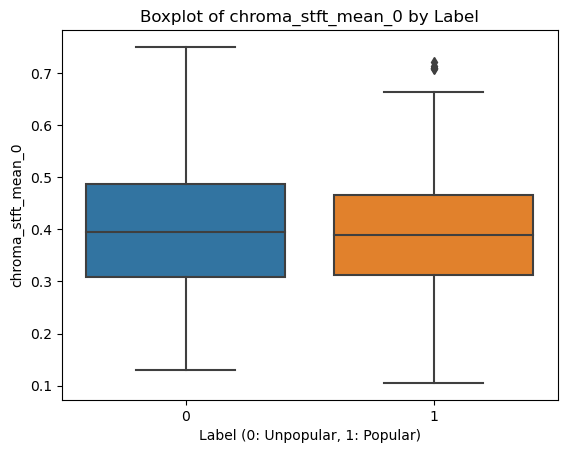

In [15]:
sns.boxplot(x='Label', y='chroma_stft_mean_0', data=data)
plt.xlabel('Label (0: Unpopular, 1: Popular)')
plt.ylabel('chroma_stft_mean_0')
plt.title('Boxplot of chroma_stft_mean_0 by Label')
plt.show()
plt.show()


<h1 style="font-family:'Book Antiqua';color:brown;"> Creation of New Features</h1>

In [16]:
def create_spectral_centroid_flux(data):
  data['spectral_centroid_flux'] = data['chroma_stft_mean_0'].diff()  
  return data

data_with_new_features = create_spectral_centroid_flux(data)
data_with_new_features.columns
data_with_new_features['spectral_centroid_flux']

0           NaN
1     -0.220151
2     -0.113303
3      0.064336
4      0.215854
         ...   
746    0.302173
747    0.072187
748   -0.111975
749    0.030844
750   -0.276840
Name: spectral_centroid_flux, Length: 751, dtype: float64

In [49]:
data['spectral_centroid_flux'].fillna(0, inplace=True)
data['spectral_centroid_flux']

0      0.000000
1     -0.220151
2     -0.113303
3      0.064336
4      0.215854
         ...   
746    0.302173
747    0.072187
748   -0.111975
749    0.030844
750   -0.276840
Name: spectral_centroid_flux, Length: 751, dtype: float64

_**"spectral_centroid_flux" calcul the change in spectral centroid between consecutive segments of the audio.
Spectral centroid represents the "center of mass" of the spectrum, indicating the average frequency content**_

In [50]:
def create_melodic_centroid_feature(data):
  # Assuming presence of chroma_stft features
  centroid = np.sum(data.filter(like='chroma_stft_mean_'), axis=1) / data.shape[1]
  data['melodic_centroid'] = centroid
  return data
data_with_new_features1 = create_melodic_centroid_feature(data)
print(data_with_new_features1)

             Artist                           Title  Label  \
0        The Weeknd                 Blinding Lights      1   
1    Olivia Rodrigo                        Good 4 U      1   
2    Olivia Rodrigo                 Drivers License      1   
3         Lil Nas X  Montero (Call Me By Your Name)      1   
4               BTS                          Butter      1   
..              ...                             ...    ...   
746    Gwen Stefani                           Crash      0   
747    Gwen Stefani                       Luxurious      0   
748         Rihanna    If It's Lovin' That You Want      0   
749     Alicia Keys                     Unbreakable      0   
750   Rascal Flatts                 Skin (Sarabeth)      0   

                                                  Path  \
0    Songs/The Weeknd - Blinding Lights (Official V...   
1    Songs/Olivia Rodrigo - good 4 u (Official Vide...   
2    Songs/Olivia Rodrigo - drivers license (Offici...   
3    Songs/Lil Nas X - 

_**This calculates the average melodic pitch across time based on the chroma features**_


In [20]:
def create_melodic_rmsv_feature(data):
  centroid = data['melodic_centroid']
  data['melodic_rmsv'] = np.sqrt(np.mean((centroid - np.mean(centroid))**2))
  return data
data_with_new_features2=create_melodic_rmsv_feature(data)
print(data_with_new_features2)


             Artist                           Title  Label  \
0        The Weeknd                 Blinding Lights      1   
1    Olivia Rodrigo                        Good 4 U      1   
2    Olivia Rodrigo                 Drivers License      1   
3         Lil Nas X  Montero (Call Me By Your Name)      1   
4               BTS                          Butter      1   
..              ...                             ...    ...   
746    Gwen Stefani                           Crash      0   
747    Gwen Stefani                       Luxurious      0   
748         Rihanna    If It's Lovin' That You Want      0   
749     Alicia Keys                     Unbreakable      0   
750   Rascal Flatts                 Skin (Sarabeth)      0   

                                                  Path  \
0    Songs/The Weeknd - Blinding Lights (Official V...   
1    Songs/Olivia Rodrigo - good 4 u (Official Vide...   
2    Songs/Olivia Rodrigo - drivers license (Offici...   
3    Songs/Lil Nas X - 

_**Melodic Root Mean Square Variation (RMSV): This captures the variation in the melodic contour**_


_Table of new features:_

In [51]:
data[['spectral_centroid_flux','melodic_centroid','melodic_rmsv']]

,spectral_centroid_flux,melodic_centroid,melodic_rmsv
0,0.000000,0.011581,0.001746
1,-0.220151,0.007328,0.001746
2,-0.113303,0.005596,0.001746
3,0.064336,0.007875,0.001746
4,0.215854,0.009445,0.001746
...,...,...,...
746,0.302173,0.010654,0.001746
747,0.072187,0.008620,0.001746
748,-0.111975,0.009942,0.001746
749,0.030844,0.012441,0.001746


<h1 style="font-family:'Book Antiqua';color:brown;"> Normalization and Scaling</h1>

Feature scaling use to reduce the variance effect and to overcome the fitting problem. there are two types of scaling methods:

**1.Standardization :** use when all features are having high values, not 0 and 1.
It is a technique to standardize the independent features that present in a fixed range to bring all values to the same magnitudes.
$$
Z= \frac{X-μ}{σ}
$$

In standardization, the mean of the independent features is 0 and the standard deviation is 1.

**2.Normalization:** also makes the training process less sensitive by the scale of the features. This results in getting 
better coefficients after training.
$$
x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

&nbsp; &nbsp; &nbsp; **2.1.MinMaxScaler :** It is a method to rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.

&nbsp; &nbsp; &nbsp; **2.2.Mean Normalizationr :** It is a method to rescales the feature to a hard and fast range of [-1,1] with mean=0.
$$
x_{\text{'}} = \frac{x - x_{\text{mean}}}{x_{\text{max}} - x_{\text{min}}}
$$

In [85]:
float_data = data.select_dtypes(include=[np.float64])
float_data

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0,spectral_centroid_flux,melodic_centroid,melodic_rmsv
0,0.091806,0.049545,1.0,0.306971,0.570429,0.556123,-1.389693,0.344998,0.035745,1.0,...,-0.604349,0.022585,0.102132,0.017701,0.072071,0.074626,0.012681,0.000000,0.011581,0.001746
1,1.025965,0.007265,1.0,0.274179,0.350277,0.265414,0.140231,0.379772,0.004221,1.0,...,-0.233246,0.057460,0.229705,0.035304,0.147578,0.157302,-0.281870,-0.220151,0.007328,0.001746
2,1.395750,0.000648,1.0,0.307888,0.236975,0.087020,0.739644,1.646942,0.000456,1.0,...,0.742759,0.023492,0.178957,0.032571,0.077563,0.066463,-0.180427,-0.113303,0.005596,0.001746
3,0.926616,0.003467,1.0,0.242382,0.301311,0.262466,0.285644,0.843115,0.003586,1.0,...,0.524002,0.051111,0.277596,0.045581,0.147997,0.142472,-0.344706,0.064336,0.007875,0.001746
4,0.311976,0.037900,1.0,0.336300,0.517165,0.438171,-1.429111,0.892591,0.045833,1.0,...,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578,0.215854,0.009445,0.001746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0.257423,0.023126,1.0,0.312051,0.498186,0.443878,-1.335261,-0.236530,0.031392,1.0,...,1.622096,0.057732,0.331247,0.044447,0.155034,0.142721,3.141514,0.302173,0.010654,0.001746
747,-0.020788,0.013594,1.0,0.327147,0.570372,0.553099,-1.405522,1.232143,0.013089,1.0,...,1.686463,0.045261,0.415374,0.070371,0.156106,0.137642,3.006131,0.072187,0.008620,0.001746
748,0.560998,0.000398,1.0,0.302554,0.458398,0.369975,-0.900844,0.880603,0.008680,1.0,...,0.344456,0.025941,0.214603,0.035465,0.114828,0.112834,0.024774,-0.111975,0.009942,0.001746
749,0.412242,0.028240,1.0,0.291556,0.489242,0.398040,-1.180265,0.640337,0.016811,1.0,...,0.823857,0.010113,0.067619,0.012221,0.029605,0.029252,0.587163,0.030844,0.012441,0.001746


In [53]:
scaler = StandardScaler()

In [54]:
scaled_data = scaler.fit_transform(float_data)
scaled_data 

array([[-1.22382420e+00,  1.85928827e+00,  4.54923941e-02, ...,
         2.89032643e-03,  1.44668171e+00, -6.50521303e-19],
       [ 4.25702038e-01, -6.15305300e-01,  4.54923941e-02, ...,
        -1.33183899e+00, -9.98706349e-01, -6.50521303e-19],
       [ 1.07866468e+00, -1.00256425e+00,  4.54923941e-02, ...,
        -6.84038251e-01, -1.99467226e+00, -6.50521303e-19],
       ...,
       [-3.95331097e-01, -1.01720731e+00,  4.54923941e-02, ...,
        -6.75986303e-01,  5.04426057e-01, -6.50521303e-19],
       [-6.58001694e-01,  6.12350994e-01,  4.54923941e-02, ...,
         1.89892259e-01,  1.94143166e+00, -6.50521303e-19],
       [ 1.53574853e+00, -6.17603619e-01,  4.54923941e-02, ...,
        -1.67552900e+00, -7.20025288e-01, -6.50521303e-19]])

In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))  # Normaliser entre 0 et 1 (plage par défaut)
data_normalisee = scaler.fit_transform(float_data)
data_normalisee

array([[0.20304838, 0.31359618, 1.        , ..., 0.4888734 , 0.56293847,
        0.        ],
       [0.43778858, 0.045382  , 1.        , ..., 0.26797341, 0.21919536,
        0.        ],
       [0.53071015, 0.0034081 , 1.        , ..., 0.37518554, 0.0791945 ,
        0.        ],
       ...,
       [0.32094928, 0.00182098, 1.        , ..., 0.37651815, 0.43048755,
        0.        ],
       [0.28356925, 0.17844418, 1.        , ..., 0.51982254, 0.63248444,
        0.        ],
       [0.59575668, 0.04513289, 1.        , ..., 0.21109213, 0.25836897,
        0.        ]])

In [86]:
colums_name = float_data.columns.tolist()
colums_name

['chroma_stft_kew_0',
 'chroma_stft_min_0',
 'chroma_stft_max_0',
 'chroma_stft_std_0',
 'chroma_stft_mean_0',
 'chroma_stft_median_0',
 'chroma_stft_kurtosis_0',
 'chroma_stft_kew_1',
 'chroma_stft_min_1',
 'chroma_stft_max_1',
 'chroma_stft_std_1',
 'chroma_stft_mean_1',
 'chroma_stft_median_1',
 'chroma_stft_kurtosis_1',
 'chroma_stft_kew_2',
 'chroma_stft_min_2',
 'chroma_stft_max_2',
 'chroma_stft_std_2',
 'chroma_stft_mean_2',
 'chroma_stft_median_2',
 'chroma_stft_kurtosis_2',
 'chroma_stft_kew_3',
 'chroma_stft_min_3',
 'chroma_stft_max_3',
 'chroma_stft_std_3',
 'chroma_stft_mean_3',
 'chroma_stft_median_3',
 'chroma_stft_kurtosis_3',
 'chroma_stft_kew_4',
 'chroma_stft_min_4',
 'chroma_stft_max_4',
 'chroma_stft_std_4',
 'chroma_stft_mean_4',
 'chroma_stft_median_4',
 'chroma_stft_kurtosis_4',
 'chroma_stft_kew_5',
 'chroma_stft_min_5',
 'chroma_stft_max_5',
 'chroma_stft_std_5',
 'chroma_stft_mean_5',
 'chroma_stft_median_5',
 'chroma_stft_kurtosis_5',
 'chroma_stft_kew_6',


In [95]:
data_frame = pd.DataFrame(data_normalisee)  
float_data1 = data_frame.select_dtypes(include=[np.float64])
float_data1.rename(columns=dict(zip(float_data1.columns, colums_name)), inplace=True)
data_frame_final = pd.DataFrame(float_data1)  
float_data1 = data_frame_final.select_dtypes(include=[np.float64])
float_data1

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0,spectral_centroid_flux,melodic_centroid,melodic_rmsv
0,0.203048,0.313596,1.0,0.592631,0.721569,0.623104,0.025201,0.289019,0.231885,1.0,...,0.290545,0.221848,0.199003,0.204507,0.290327,0.300633,0.138128,0.488873,0.562938,0.0
1,0.437789,0.045382,1.0,0.479549,0.379935,0.275153,0.129686,0.297817,0.026891,1.0,...,0.362302,0.591915,0.525223,0.459475,0.670957,0.705249,0.112427,0.267973,0.219195,0.0
2,0.530710,0.003408,1.0,0.595794,0.204111,0.061633,0.170622,0.618435,0.002408,1.0,...,0.551026,0.231473,0.395454,0.419900,0.318013,0.260681,0.121279,0.375186,0.079194,0.0
3,0.412824,0.021290,1.0,0.369898,0.303949,0.271625,0.139617,0.415052,0.022763,1.0,...,0.508726,0.524543,0.647686,0.608342,0.673068,0.632671,0.106944,0.553428,0.263398,0.0
4,0.258374,0.239722,1.0,0.693772,0.638913,0.481927,0.022509,0.427570,0.297484,1.0,...,0.929522,0.479307,0.540647,0.394453,0.417498,0.376873,0.829799,0.705461,0.390289,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,0.244665,0.146001,1.0,0.610149,0.609461,0.488758,0.028919,0.141881,0.203572,1.0,...,0.721057,0.594803,0.784878,0.591912,0.708545,0.633892,0.411138,0.792074,0.487966,0.0
747,0.174755,0.085535,1.0,0.662210,0.721481,0.619484,0.024120,0.513483,0.084558,1.0,...,0.733503,0.462464,1.000000,0.967414,0.713944,0.609033,0.399325,0.561306,0.323613,0.0
748,0.320949,0.001821,1.0,0.577400,0.547718,0.400303,0.058587,0.424537,0.055884,1.0,...,0.474009,0.257459,0.486606,0.461810,0.505866,0.487626,0.139184,0.376518,0.430488,0.0
749,0.283569,0.178444,1.0,0.539475,0.595583,0.433894,0.039504,0.363745,0.108758,1.0,...,0.566707,0.089509,0.110750,0.125131,0.076259,0.078571,0.188255,0.519823,0.632484,0.0


<h1 style="font-family:'Book Antiqua';color:brown;"> Encoding Categorical Variables </h1>

In [98]:
Categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
Categorical_columns

['Artist', 'Title', 'Path', 'choruspath']

In [111]:
liste_colonne_a = data['Artist'].tolist()
liste_colonne_a

['The Weeknd',
 'Olivia Rodrigo',
 'Olivia Rodrigo',
 'Lil Nas X',
 'BTS',
 'Olivia Rodrigo',
 'Ariana Grande',
 'Ed Sheeran',
 'Luke Combs',
 'Pop Smoke',
 'Billie Eilish',
 'Cardi B',
 'Olivia Rodrigo',
 'BTS',
 'Doja Cat',
 'Taylor Swift',
 'Luke Combs',
 'Doja Cat',
 'Drake',
 'Justin Bieber',
 'Ariana Grande',
 'The Weeknd',
 'Billie Eilish',
 'Post Malone',
 'Harry Styles',
 'Maroon 5',
 'Doja Cat',
 'Billie Eilish',
 'Harry Styles',
 'The Weeknd',
 'DaBaby',
 'Drake',
 'Morgan Wallen',
 'Lil Baby',
 'Travis Scott',
 'Billie Eilish',
 'Justin Bieber',
 'Lil Nas X',
 'Lil Baby',
 'Lil Baby',
 'Jonas Brothers',
 'Lil Baby',
 'Halsey',
 'Pop Smoke',
 'Luke Combs',
 'Juice WRLD',
 'Morgan Wallen',
 'Luke Combs',
 'Halsey',
 'Post Malone',
 'Ariana Grande',
 'Travis Scott',
 'Jonas Brothers',
 'Ariana Grande',
 'DaBaby',
 'Shawn Mendes',
 'Post Malone',
 'Ariana Grande',
 'Cardi B',
 'Taylor Swift',
 'Luke Combs',
 'Juice WRLD',
 'Morgan Wallen',
 'Luke Combs',
 'Billie Eilish',
 'Ari

In [122]:
le = LabelEncoder()
encoded_artists = le.fit_transform(data["Artist"])
print(encoded_artists)
decoded_artists = le.inverse_transform(encoded_artists)
#Display decoded artist names
print(decoded_artists)


[66 51 51 40  5 51  3 19 42 55  7 11 51  5 17 63 42 17 18 30  3 66  7 56
 26 43 17  7 26 66 15 18 47 39 67  7 30 40 39 39 28 39 25 55 42 29 47 42
 25 56  3 67 28  3 15 61 56  3 11 63 42 29 47 42  7  3  7 39 53 29 18 19
 18 18 69 10  3 27 63 25 27 56 61 59 18 11 43 11  3 27 19 66 18 69 69 42
 27  9 35 23  9 61 58 18 63 19 64 61 25 35 18 67 42 53 26  0 46 61 30 30
 70  0 58 70 61 18  0 30 66 53  3 18 45  3 66 45 56 66 14 67 63  0 13 14
 23 19 22 43 63 66 63 45 59 45 63 19 43 58 59  6 52  3 45 19 52 18 54 27
 52 43 50 46 31 33 14 27 33  6 18 31  9  9 63 46 58 18 43 37 43 27 43 53
 34 20 58 63 52 19 35 48 50 52  0 36 33 58  9 30 33 63 53 33  0 13  0 14
 12  0 68 50 13 58 33  9 50 58 33  9 53 37 53 41  9  8 37 34 34 58  8 13
 32  8 68  4 37 63 33 58 18  6 13 34 37 58 20 34 18 37 63 63 34 18 43 37
 50 46  8  2 68 63  6 12 16  2 37 63  6 65 46 18  6 33  8 37 33 53  8 48
 32 53  6 49 53 14  1 48 16 49  8 63 58  6 30 65 38  2 13 13 58 33 58 48
 21 46 63 41  2 63 38 28 21  8 46 16  6 12  1  4 43